In [1]:
!pip install torchinfo
import torch
import torch.optim as optim
from models import Net
from torchvision import transforms as T
from utils import Trainer, build_cifar, plot_misclassified, plot_sampledata

In [2]:
# Train data transformations
train_transforms = T.Compose(
    [
        T.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.40, hue=0.1),
        T.RandomRotation((-5.0, 5.0), fill=(0.49139968, 0.48215841, 0.44653091)),
        T.RandomHorizontalFlip(),
        T.ToTensor(),
        T.Normalize(
            (0.49139968, 0.48215841, 0.44653091),
            (0.24703223, 0.24348513, 0.26158784),
        ),
    ]
)

# Test data transformations
test_transforms = T.Compose([T.ToTensor(), T.Normalize((0.1307,), (0.3081,))])

batch_size = 64

kwargs = {
    "batch_size": batch_size,
    "shuffle": True,
    "num_workers": 2,
    "pin_memory": True,
}

train_data, train_loader = build_cifar(set="train", transforms=train_transforms, **kwargs)
test_data, test_loader = build_cifar(set="test", transforms=test_transforms, **kwargs)

100%|██████████| 170498071/170498071 [00:05<00:00, 29864847.89it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


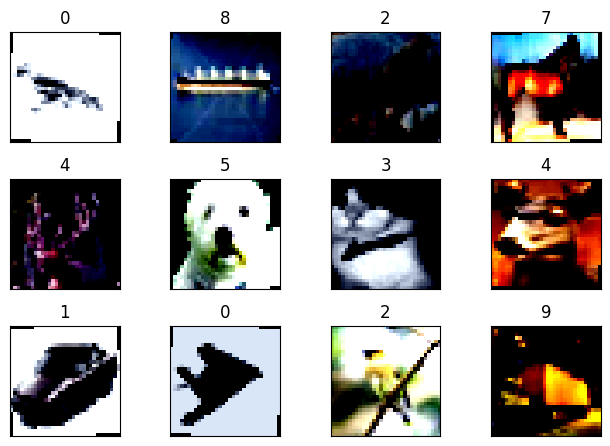

In [3]:
plot_sampledata(train_loader)

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)

In [5]:
model.summarize(device, (1, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1, 10]                   --
├─Sequential: 1-1                        [1, 16, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 8, 32, 32]            216
│    └─ReLU: 2-2                         [1, 8, 32, 32]            --
│    └─BatchNorm2d: 2-3                  [1, 8, 32, 32]            16
│    └─Dropout2d: 2-4                    [1, 8, 32, 32]            --
│    └─Conv2d: 2-5                       [1, 16, 32, 32]           1,152
│    └─ReLU: 2-6                         [1, 16, 32, 32]           --
│    └─BatchNorm2d: 2-7                  [1, 16, 32, 32]           32
│    └─Dropout2d: 2-8                    [1, 16, 32, 32]           --
├─Sequential: 1-2                        [1, 8, 16, 16]            --
│    └─Conv2d: 2-9                       [1, 8, 32, 32]            128
│    └─ReLU: 2-10                        [1, 8, 32, 32]            --
│    └─Dro

In [6]:
num_epochs = 20
model = Net(drop=0.025).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.015, momentum=0.9)
scheduler = optim.lr_scheduler.OneCycleLR(
    optimizer, max_lr=0.015, epochs=num_epochs, steps_per_epoch=len(train_loader)
)
# scheduler = None

trainer = Trainer(model, device, optimizer, scheduler)
for epoch in range(1, num_epochs + 1):
    print(f"Epoch {epoch}")
    trainer.train(train_loader)
    trainer.test(test_loader)

Epoch 1


Train: Loss=1.3297 Batch_id=781 Accuracy=27.37: 100%|██████████| 782/782 [00:58<00:00, 13.29it/s]


Test set: Average loss: 1.9017, Accuracy: 2871/10000 (28.71%)

Epoch 2


Train: Loss=1.9390 Batch_id=781 Accuracy=39.22: 100%|██████████| 782/782 [00:56<00:00, 13.86it/s]


Test set: Average loss: 1.5041, Accuracy: 4489/10000 (44.89%)

Epoch 3


Train: Loss=1.5091 Batch_id=781 Accuracy=46.92: 100%|██████████| 782/782 [00:57<00:00, 13.69it/s]


Test set: Average loss: 1.2952, Accuracy: 5265/10000 (52.65%)

Epoch 4


Train: Loss=0.8373 Batch_id=781 Accuracy=53.40: 100%|██████████| 782/782 [00:55<00:00, 14.05it/s]


Test set: Average loss: 1.2116, Accuracy: 5700/10000 (57.00%)

Epoch 5


Train: Loss=1.3302 Batch_id=781 Accuracy=57.37: 100%|██████████| 782/782 [00:55<00:00, 14.03it/s]


Test set: Average loss: 1.0771, Accuracy: 6263/10000 (62.63%)

Epoch 6


Train: Loss=1.5335 Batch_id=781 Accuracy=60.04: 100%|██████████| 782/782 [00:56<00:00, 13.91it/s]


Test set: Average loss: 1.0606, Accuracy: 6317/10000 (63.17%)

Epoch 7


Train: Loss=0.8367 Batch_id=781 Accuracy=61.74: 100%|██████████| 782/782 [00:56<00:00, 13.76it/s]


Test set: Average loss: 1.0662, Accuracy: 6256/10000 (62.56%)

Epoch 8


Train: Loss=1.4355 Batch_id=781 Accuracy=63.43: 100%|██████████| 782/782 [00:59<00:00, 13.25it/s]


Test set: Average loss: 0.9305, Accuracy: 6754/10000 (67.54%)

Epoch 9


Train: Loss=0.9220 Batch_id=781 Accuracy=64.68: 100%|██████████| 782/782 [00:57<00:00, 13.66it/s]


Test set: Average loss: 0.9023, Accuracy: 6879/10000 (68.79%)

Epoch 10


Train: Loss=0.7452 Batch_id=781 Accuracy=65.73: 100%|██████████| 782/782 [00:57<00:00, 13.67it/s]


Test set: Average loss: 0.8653, Accuracy: 6993/10000 (69.93%)

Epoch 11


Train: Loss=0.7437 Batch_id=781 Accuracy=66.73: 100%|██████████| 782/782 [00:57<00:00, 13.71it/s]


Test set: Average loss: 0.8789, Accuracy: 6965/10000 (69.65%)

Epoch 12


Train: Loss=1.2283 Batch_id=781 Accuracy=67.27: 100%|██████████| 782/782 [01:07<00:00, 11.65it/s]


Test set: Average loss: 0.8626, Accuracy: 7023/10000 (70.23%)

Epoch 13


Train: Loss=1.0508 Batch_id=781 Accuracy=68.15: 100%|██████████| 782/782 [00:57<00:00, 13.52it/s]


Test set: Average loss: 0.8585, Accuracy: 7034/10000 (70.34%)

Epoch 14


Train: Loss=0.7085 Batch_id=781 Accuracy=68.80: 100%|██████████| 782/782 [01:04<00:00, 12.08it/s]


Test set: Average loss: 0.8048, Accuracy: 7208/10000 (72.08%)

Epoch 15


Train: Loss=0.8312 Batch_id=781 Accuracy=69.32: 100%|██████████| 782/782 [00:58<00:00, 13.47it/s]


Test set: Average loss: 0.8090, Accuracy: 7241/10000 (72.41%)

Epoch 16


Train: Loss=1.1571 Batch_id=781 Accuracy=69.90: 100%|██████████| 782/782 [00:56<00:00, 13.72it/s]


Test set: Average loss: 0.7983, Accuracy: 7186/10000 (71.86%)

Epoch 17


Train: Loss=0.8070 Batch_id=781 Accuracy=70.55: 100%|██████████| 782/782 [00:57<00:00, 13.69it/s]


Test set: Average loss: 0.7603, Accuracy: 7353/10000 (73.53%)

Epoch 18


Train: Loss=0.9179 Batch_id=781 Accuracy=71.21: 100%|██████████| 782/782 [00:57<00:00, 13.55it/s]


Test set: Average loss: 0.7531, Accuracy: 7379/10000 (73.79%)

Epoch 19


Train: Loss=0.7080 Batch_id=781 Accuracy=71.45: 100%|██████████| 782/782 [00:57<00:00, 13.70it/s]


Test set: Average loss: 0.7448, Accuracy: 7418/10000 (74.18%)

Epoch 20


Train: Loss=0.2972 Batch_id=781 Accuracy=71.72: 100%|██████████| 782/782 [00:57<00:00, 13.71it/s]


Test set: Average loss: 0.7484, Accuracy: 7416/10000 (74.16%)



Set\t Max Acc@Epoch	 Last Epoch Acc
train	 71.72@20		71.72
test	 74.18@19		74.16


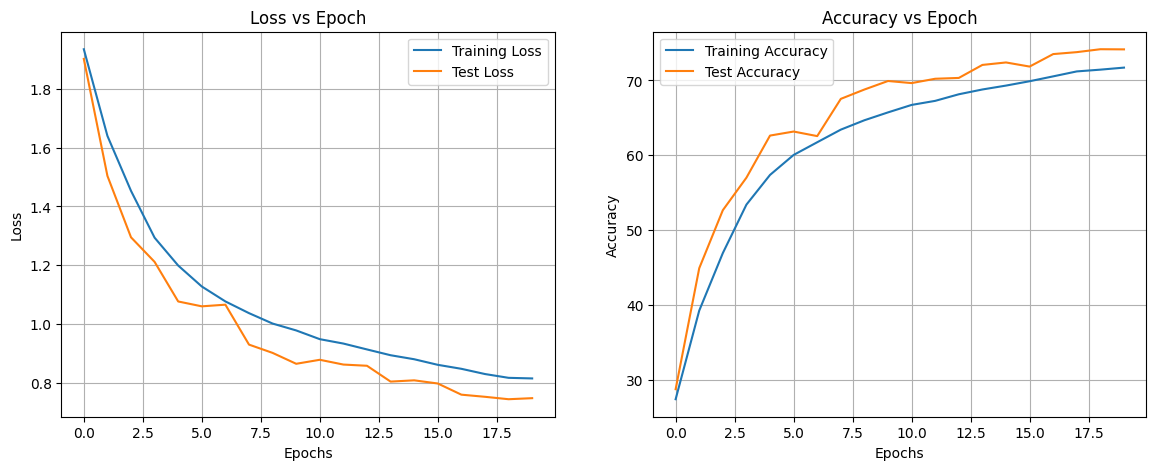

In [7]:
trainer.plot_history()

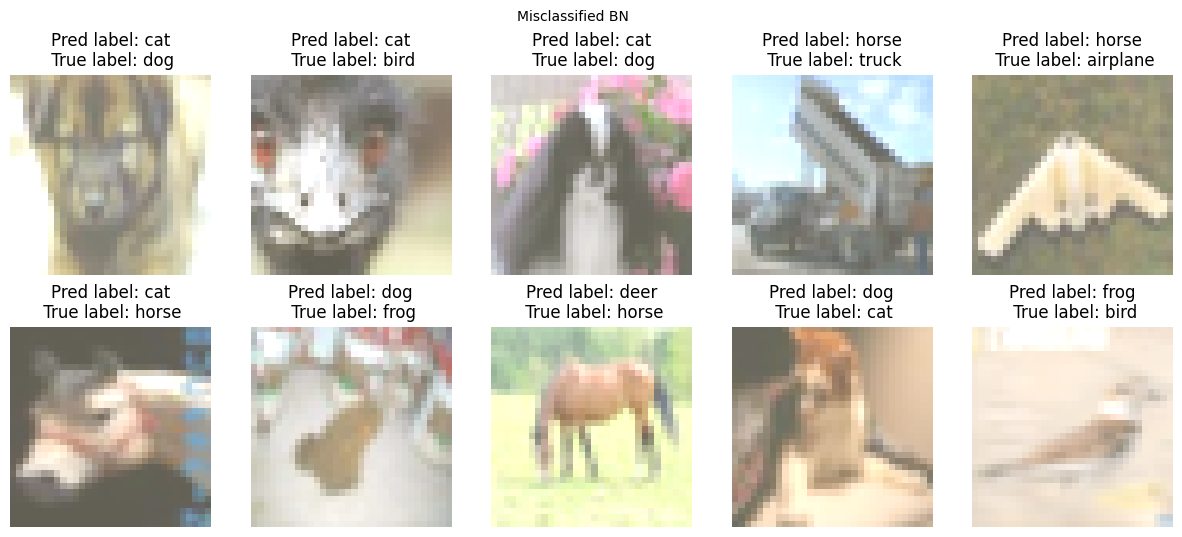

In [8]:
plot_misclassified(
    model,
    test_loader,
    device,
    (0.49139968, 0.48215841, 0.44653091),
    (0.24703223, 0.24348513, 0.26158784),
)